In [1]:
import networkx as nx
import numpy as np
from random import sample
from random import choices
from random import randrange
import random
import pandas as pd

from os.path import join, exists

In [2]:
# Dataframe loading
folder_path = r"../Shasha/tNodeEmbed/data/Meetings"
nodes_path = join(folder_path, "nodes_1.csv")
edges_path = join(folder_path, "edges_1.csv")

nodes = pd.read_csv(nodes_path, index_col = False)
edges = pd.read_csv(edges_path, index_col = False)

{0: Text(0.9230989395933127, 0.4097022789378865, 'Age: 50\nSex: male\nPrev_state:sick'),
 1: Text(0.7591296896841219, -0.16874824016175688, 'Age: 10\nSex: female\nPrev_state:healthy'),
 2: Text(0.231513871423719, 1.2009617794244365, 'Age: 45\nSex: female\nPrev_state:sick'),
 3: Text(-1.0, 0.018610295447482494, 'Age: 30\nSex: male\nPrev_state:sick'),
 4: Text(-0.6393233861876404, -0.28260782214536373, 'Age: 55\nSex: male\nPrev_state:sick'),
 5: Text(0.34786863227979103, -0.5967006969890042, 'Age: 45\nSex: female\nPrev_state:healthy'),
 6: Text(-0.21630769807433461, -0.6078335354727897, 'Age: 32\nSex: male\nPrev_state:healthy'),
 7: Text(-0.7194948452147669, 0.6213243486340339, 'Age: 18\nSex: female\nPrev_state:sick'),
 8: Text(0.6540129079021823, 0.856294231816028, 'Age: 46\nSex: male\nPrev_state:healthy'),
 9: Text(-0.34049811140638503, 1.0489973605090475, 'Age: 57\nSex: male\nPrev_state:healthy')}

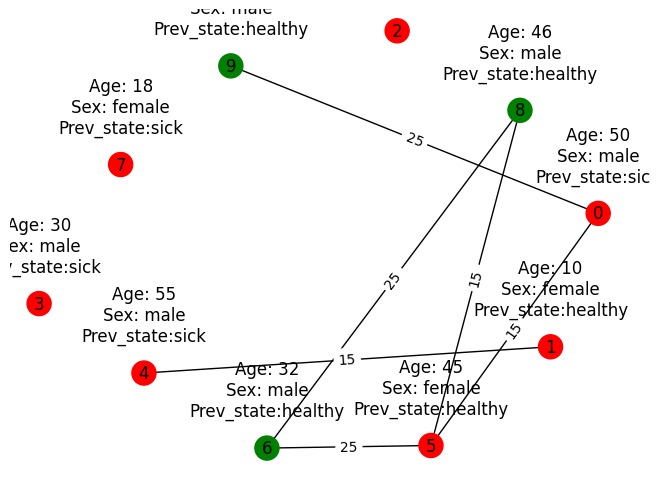

In [9]:
# Visualizing the graph

# Selezionare lo step
step_i = 1
nodes_at_step_i = nodes.loc[nodes["Step"] == step_i]


edges_at_step_i = edges.loc[edges["Step"] == step_i]
G = nx.Graph()
G.add_nodes_from(list(nodes_at_step_i["ID"]))
G.add_weighted_edges_from(list(zip(edges_at_step_i["ID_1"], edges_at_step_i["ID_2"], edges_at_step_i["Duration"])))
# G = nx.from_pandas_edgelist(edges_at_step_i, source = "ID_1", target = "ID_2", edge_attr = "Duration")
pos = nx.spring_layout(G, k=13)
color_map = ["red" if nodes_at_step_i.loc[nodes_at_step_i["ID"] == node].State.values == "sick" else "green" for node in G.nodes]
nx.draw(G, pos, with_labels = True, node_color = color_map)
labels = {e: G.edges[e]['weight'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)
pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] + 0.25)
custom_node_attrs = {}
prev_states = nodes.loc[nodes["Step"] == (step_i -1)]["State"]
for node, sex, age in list(zip(list(nodes_at_step_i["ID"]), list(nodes_at_step_i["Sex"]), list(nodes_at_step_i["Age"]))):
    if step_i != 0:
        custom_node_attrs[node] = "Age: " + str(age) + "\nSex: " + sex + "\nPrev_state:" + prev_states.iloc[[node]].values[0]
    else:
        custom_node_attrs[node] = "Age: " + str(age) + "\nSex: " + sex 
nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs)

/tmp/ipykernel_86/1910753435.py:20: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  color_map = ["red" if nodes_at_step_i.loc[nodes_at_step_i["ID"] == node].State.values == "sick" or node=="sick" else "green" for node in G.nodes]


{0: Text(0.5024954953574403, 1.1792299569469387, 'Age: 50\nSex: male\nPrev_state:sick'),
 1: Text(-0.9017936465244074, 0.6763459191625436, 'Age: 10\nSex: female\nPrev_state:healthy'),
 2: Text(-0.8577703264106769, 0.2443213486967601, 'Age: 45\nSex: female\nPrev_state:sick'),
 3: Text(-0.031219924925306154, 1.2460526570746115, 'Age: 30\nSex: male\nPrev_state:sick'),
 4: Text(0.9812531635672791, 0.26680751553312576, 'Age: 55\nSex: male\nPrev_state:sick'),
 5: Text(0.8542283438562649, -0.28231166363121873, 'Age: 45\nSex: female\nPrev_state:healthy'),
 6: Text(-0.8598350789806858, -0.21339926512507978, 'Age: 32\nSex: male\nPrev_state:healthy'),
 7: Text(0.4642440580842373, -0.707684343495383, 'Age: 18\nSex: female\nPrev_state:sick'),
 8: Text(-0.5345009798950339, 1.0726095569431318, 'Age: 46\nSex: male\nPrev_state:healthy'),
 9: Text(-0.03634332008078572, -0.75, 'Age: 57\nSex: male\nPrev_state:healthy')}

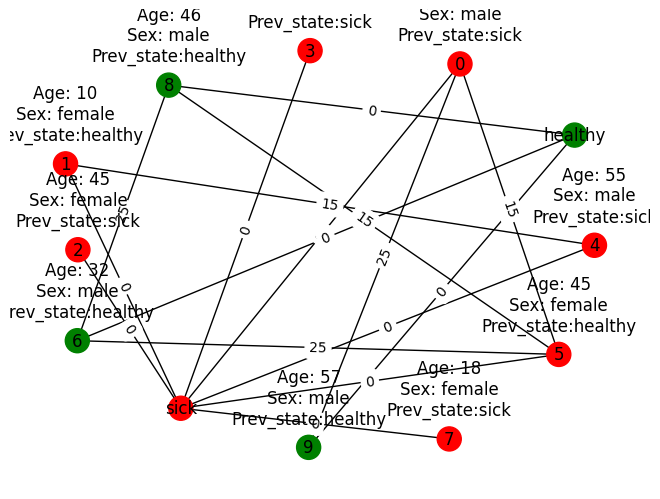

In [10]:
# Rappresentazione con nodi (sick, healthy)

new_edges = edges.copy()

for i in range(len(nodes)):
    row = nodes.iloc[i]
    new_row = {"ID_1": row.ID, "ID_2": row.State, "Old_State_1": None, "Old_State_2": None, "New_State_1": None, "New_State_2": None, "Duration": 0, "Step": row.Step}
    new_edges.loc[len(new_edges)] = new_row

step_i = 1
nodes_at_step_i = nodes.loc[nodes["Step"] == step_i]


edges_at_step_i = new_edges.loc[new_edges["Step"] == step_i]
G = nx.Graph()
G.add_nodes_from(list(nodes_at_step_i["ID"]))
G.add_weighted_edges_from(list(zip(edges_at_step_i["ID_1"], edges_at_step_i["ID_2"], edges_at_step_i["Duration"])))
# G = nx.from_pandas_edgelist(edges_at_step_i, source = "ID_1", target = "ID_2", edge_attr = "Duration")
pos = nx.spring_layout(G, k=13)
color_map = ["red" if nodes_at_step_i.loc[nodes_at_step_i["ID"] == node].State.values == "sick" or node=="sick" else "green" for node in G.nodes]
nx.draw(G, pos, with_labels = True, node_color = color_map)
labels = {e: G.edges[e]['weight'] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels)
pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] + 0.25)
custom_node_attrs = {}
prev_states = nodes.loc[nodes["Step"] == (step_i -1)]["State"]
for node, sex, age in list(zip(list(nodes_at_step_i["ID"]), list(nodes_at_step_i["Sex"]), list(nodes_at_step_i["Age"]))):
    if step_i != 0:
        custom_node_attrs[node] = "Age: " + str(age) + "\nSex: " + sex + "\nPrev_state:" + prev_states.iloc[[node]].values[0]
    else:
        custom_node_attrs[node] = "Age: " + str(age) + "\nSex: " + sex 
nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs)

In [11]:
edges.to_csv("tNodeEmbed/data/Meetings/edges_2.csv",columns = list(edges.columns), index = False)

In [12]:
nodes

,ID,Sex,Age,State,Counter,Step
0,0,male,38,healthy,0,0
1,1,female,79,healthy,0,0
2,2,male,38,healthy,0,0
3,3,female,67,sick,7,0
4,4,male,68,sick,7,0
5,5,female,73,healthy,0,0
6,6,male,58,sick,7,0
7,7,male,19,healthy,0,0
8,8,male,48,sick,7,0
9,9,male,33,sick,7,0
